# Data proccessing


<ul>
  <p style="color:black; font-size:36px;">Goals</p>
  <li><p style="color:red; font-size:18px;">We possess a dataset with details on sale prices.</p></li>
  <li><p style="color:orange; font-size:18px;">Our Goals is to create a model that forecasts sale prices for new data.</p></li>
  <li><p style="color:purple; font-size:18px;">This task involves examining the current data to uncover patterns and relationships that can guide our predictions.</p></li>
  <li><p style="color:green; font-size:18px;">By training our model on this dataset, we strive to improve its accuracy and dependability for future sales forecasts.</p></li>
  <li><p style="color:blue; font-size:18px;">Leveraging various features from the dataset, we intend to build a strong predictive tool to aid in making informed pricing decisions.</p></li>
</ul>


## Import library

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2024-08-05 13:22:44.141366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 13:22:44.141487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 13:22:44.301180: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load data set


In [2]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset = pd.read_csv(train_file_path)

## Check what's train data set look like ?

In [3]:
print("Train dataset shape is {}".format(dataset.shape))
dataset.head(5)

Train dataset shape is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


remove column "Id" from the dataset

In [4]:
dataset = dataset.drop('Id', axis=1)
dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


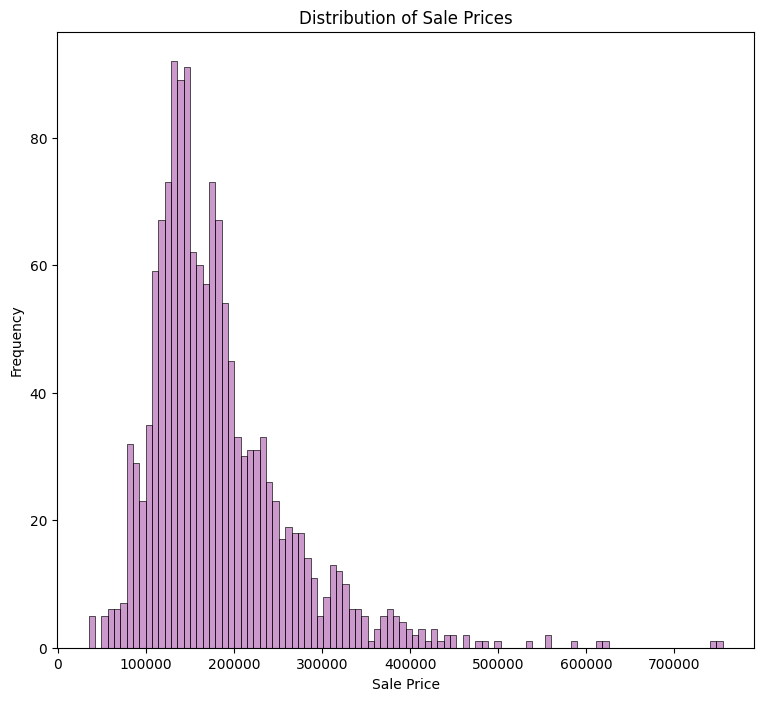

In [5]:
plt.figure(figsize=(9, 8))  
sns.histplot(dataset['SalePrice'].dropna(), color='purple', bins=100, alpha=0.4)  # Drop NaN values for plotting  
plt.title('Distribution of Sale Prices')  
plt.xlabel('Sale Price')  
plt.ylabel('Frequency')  
plt.show()

<p style="font-size:18px;">*** &#9733;&#9733;&#9733;In the world of real estate, every home has a story to tell, and every house price narrates a unique tale of its own. Let’s embark on a journey together to explore the distribution of house prices, uncovering how each price reflects the lives, dreams, and efforts of the people who call these houses their homes. &#9733;&#9733;&#9733; *** &#127769;</p>


In [6]:
from IPython.display import display, HTML
html = '<p style="color:blue; font-size:18px;">**Data description**</p>'
display(HTML(html))

print( dataset['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<p style="font-size:18px;">Let's dive into exploring the distribution of our numerical features.
    To do this, we'll start by listing all the data types in our dataset and then cherry-pick the numerical ones.  </P>

## Disturbution of our numical features


In [7]:
list(set(dataset.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [8]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#  Plot the Heat map to see correlation between each variables

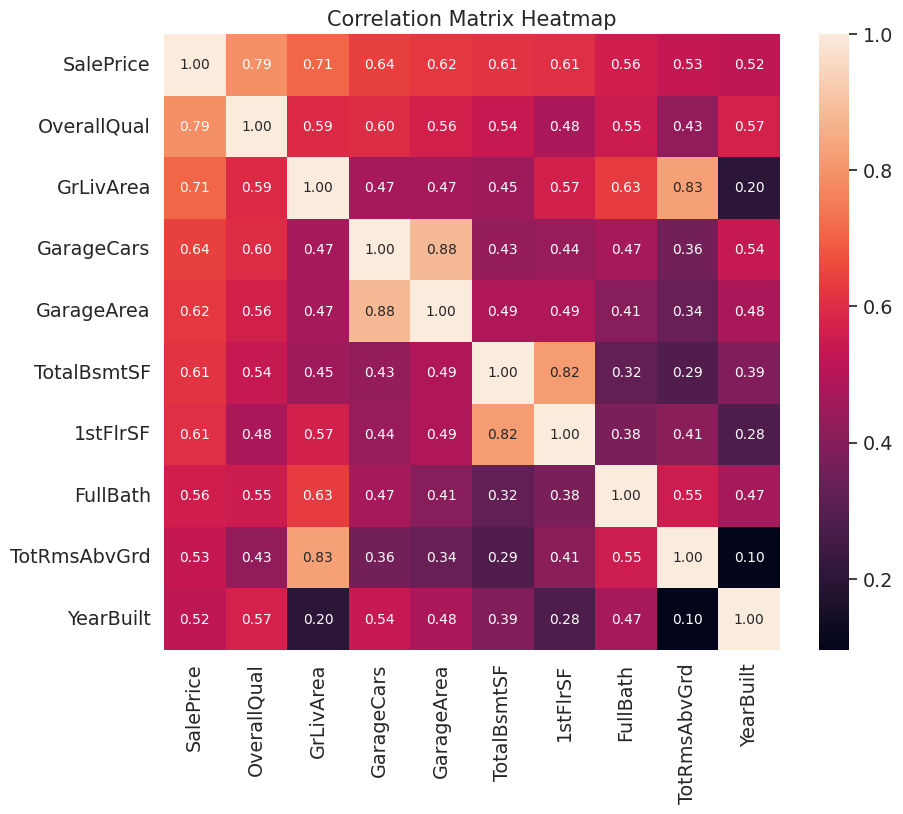

In [9]:

numeric_dataset = dataset.select_dtypes(include=[np.number])  # Select only numeric columns
corrmat = numeric_dataset.corr()  # Compute the correlation matrix

k = 10  # Number of variables for the heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index  # Get the top 'k' correlations with 'SalePrice'
cm = np.corrcoef(numeric_dataset[cols].values.T)  # Compute the correlation coefficients for the selected columns

sns.set(font_scale=1.25)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix Heatmap')
plt.show()

# So Let's plot the Histrogram to see relation between each variables and frequency

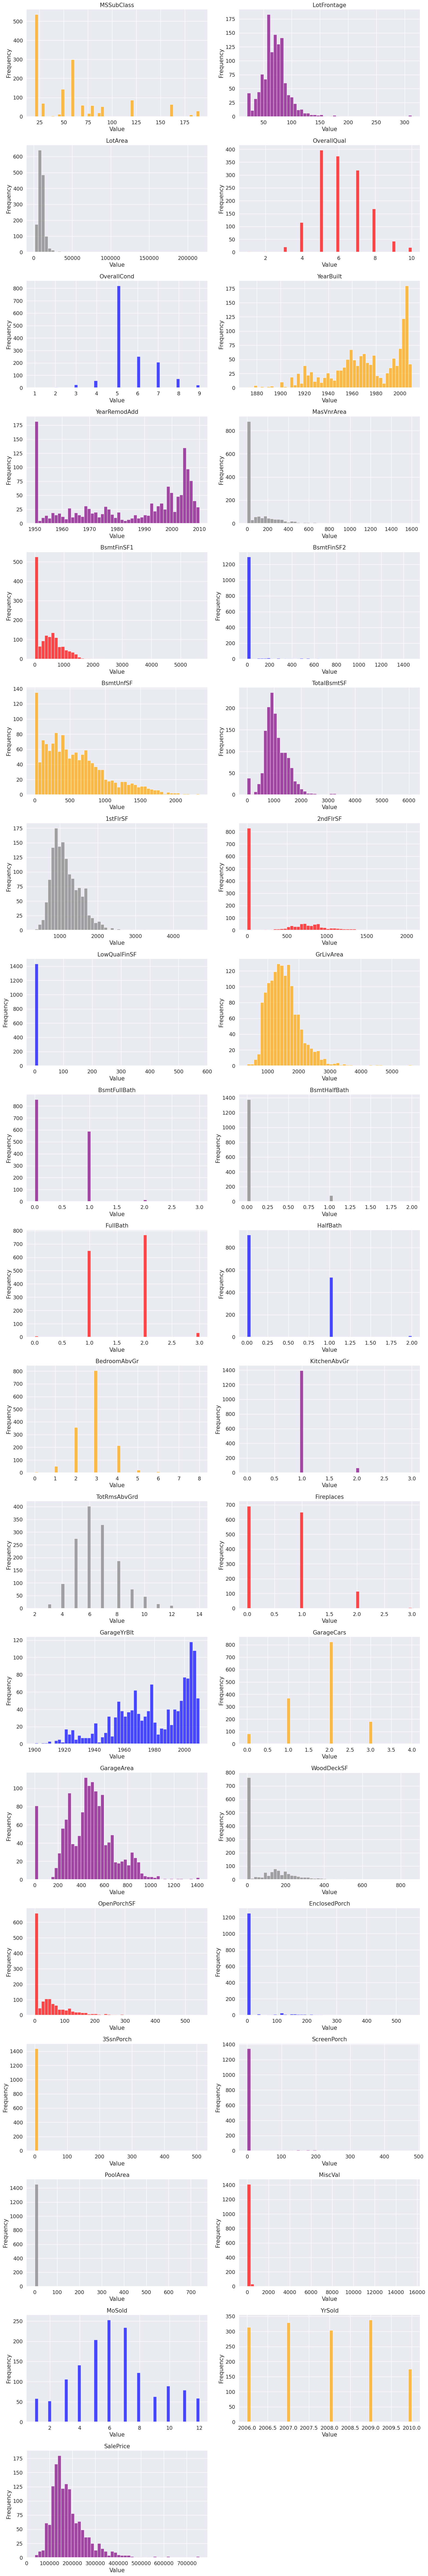

In [10]:
colors = ['orange', 'purple', 'gray', 'red', 'blue']
colors = colors * ((len(df_num.columns) // len(colors)) + 1)  # Repeat colors

# Number of subplots
num_features = len(df_num.columns)
rows = (num_features + 1) // 2  # Calculate the number of rows for the layout

# Create figure and subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 5))
axes = axes.flatten()  # Flatten the subplot array for easy access

# Plot histograms with different colors
for i, (column, ax) in enumerate(zip(df_num.columns, axes)):
    df_num[column].hist(ax=ax, bins=50, color=colors[i], alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove extra axes if the number of features is less than the number of subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Lets try some models

 # 1.Random Forest

In [11]:
def split_datasett(datase, test_ratio=0.3):
  test_indices = np.random.rand(len(datase)) < test_ratio
  return datase[~test_indices], datase[test_indices]

train_ds_pd, valid_ds_pd = split_datasett(dataset)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1026 examples in training, 434 examples in testing.


In [12]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [13]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [14]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpakbjdp7_ as temporary training directory


In [15]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.988048. Found 1026 examples.
Training model...


[INFO 24-08-05 13:23:23.7200 UTC kernel.cc:1233] Loading model from path /tmp/tmpakbjdp7_/model/ with prefix fcf684343d2249d0


Model trained in 0:00:02.292546
Compiling model...


[INFO 24-08-05 13:23:24.0749 UTC decision_forest.cc:660] Model loaded with 300 root(s), 97468 node(s), and 75 input feature(s).
[INFO 24-08-05 13:23:24.0750 UTC abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-08-05 13:23:24.0750 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


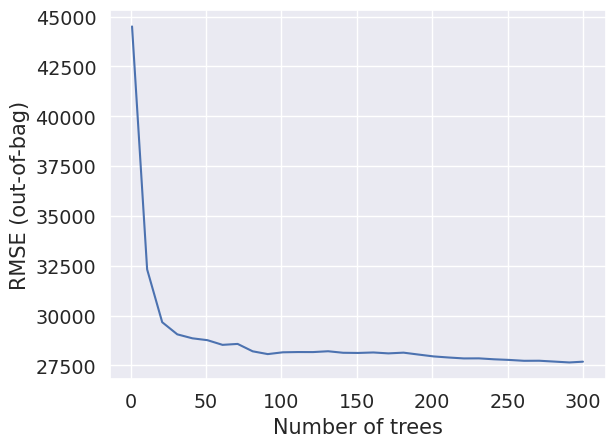

In [16]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

# Let's see how much a feature contributes to the model predictions

In [17]:
inspector = rf.make_inspector()
inspector.evaluation()
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - mse: 1288843776.0000
loss: 0.0000
mse: 1288843776.0000


In [18]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE


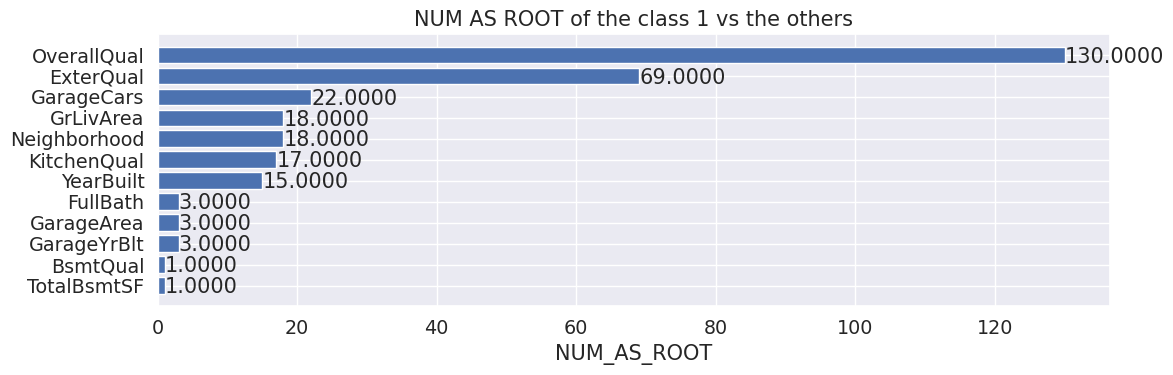

In [19]:
inspector.variable_importances()["NUM_AS_ROOT"]
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.

# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# Random Forest predict

In [20]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 22ms/step


,Id,SalePrice
0,1461,124711.984375
1,1462,156839.390625
2,1463,178048.484375
3,1464,184156.546875
4,1465,198570.359375


In [21]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 22ms/step


,Id,SalePrice
0,1461,124711.984375
1,1462,156839.390625
2,1463,178048.484375
3,1464,184156.546875
4,1465,198570.359375
